## Public Safety Structures Chart
I found that the number of buildings dedicated for public safety reflect the care that a specific neighborhood has for it's residents. While the opinions from the residents of Pittsburgh can give useful information on safety, This chart directly represents the availabilty of safety resources in a community.

## Importing and Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pth = "fbb50b02-2879-47cd-abea-ae697ec05170.csv"
df = pd.read_csv(pth)


## Locating and Sort Data

In [18]:
police = df[df["name"].str.contains("Police", case=False, na=False) |
             df["type"].str.contains("Police", case=False, na=False)]
fire = df[df["name"].str.contains("Fire", case=False, na=False) |
           df["type"].str.contains("Fire", case=False, na=False)]
medical_keywords = "Health|Medical|Clinic|Hospital|EMS|Ambulance|Rescue|Paramedic|Medic"
medical = df[df["name"].str.contains(medical_keywords, case=False, na=False) |
              df["type"].str.contains(medical_keywords, case=False, na=False)]

police_counts = police["neighborhood"].value_counts()
fire_counts = fire["neighborhood"].value_counts()
medical_counts = medical["neighborhood"].value_counts()

combined = pd.DataFrame({
    "Police Buildings": police_counts,
    "Firehouses": fire_counts,
    "Medical Buildings": medical_counts
}).fillna(0).astype(int)

combined["Total"] = combined.sum(axis=1)
combined = combined.sort_values("Total", ascending=False)

## Chart of Data

In [20]:
print("\nNumber of Police, Fire, and Medical Buildings per Neighborhood:\n")
print(combined.sort_index())


Number of Police, Fire, and Medical Buildings per Neighborhood:

                           Police Buildings  Firehouses  Medical Buildings  \
neighborhood                                                                 
Allegheny West                            1           0                  0   
Allentown                                 1           0                  1   
Beechview                                 0           1                  0   
Bloomfield                                0           0                  1   
Bluff                                     1           1                  0   
Brighton Heights                          0           1                  0   
Brookline                                 0           1                  0   
California-Kirkbride                      1           0                  0   
Carrick                                   0           1                  0   
Central Business District                 2           0                  1  

## Graph of Data

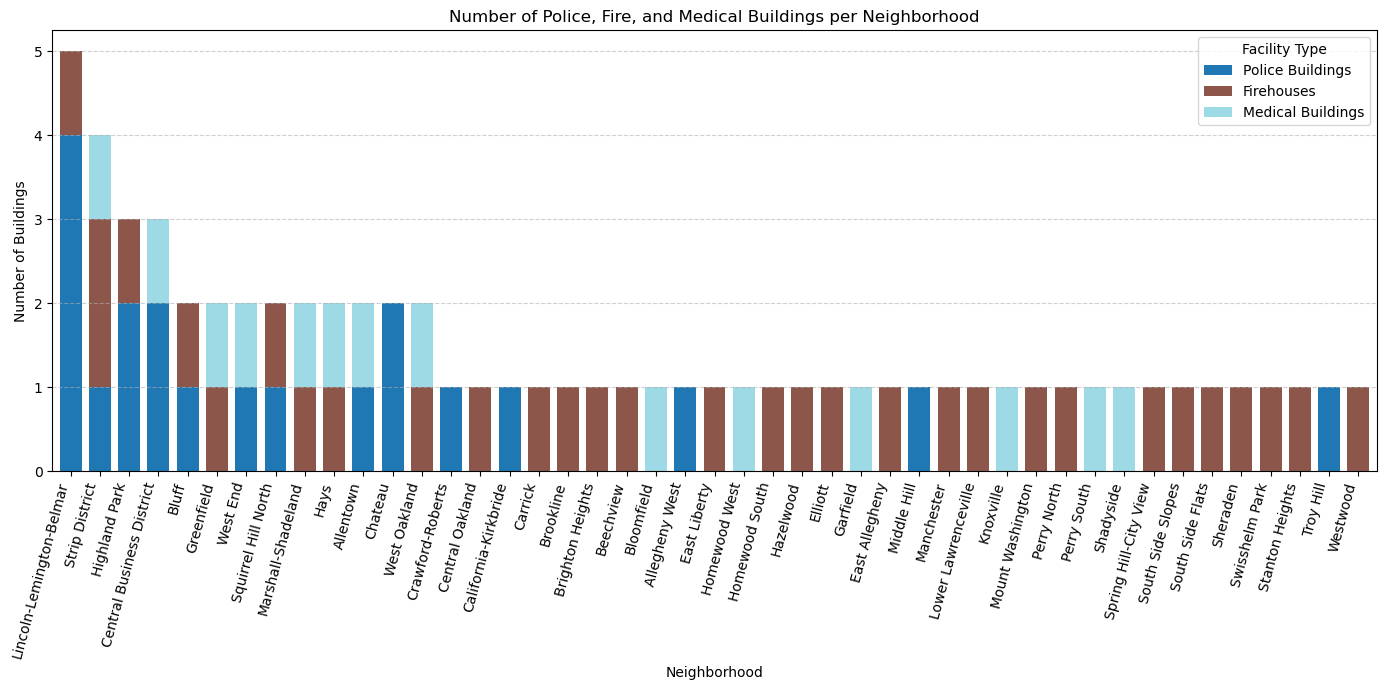

In [21]:
ax= combined[["Police Buildings", "Firehouses", "Medical Buildings"]].plot(
    kind="bar",
    stacked = True,
    figsize=(14, 7),
    width=.75,
    colormap = 'tab20'
)
plt.title("Number of Police, Fire, and Medical Buildings per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=75, ha="right")
plt.legend(title="Facility Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusion
Lincoln-Lemmington-Belmar, Strip District, Highland Park, and the Central Business District stand out for having the most infastructure dedicated to public safety. This shows the potential for protection and aid directly within a thier nieghborhood.